1. Import the CSV File for transactions
2. Read file using pandas with pd.read_csv
3. Next clean data by making a new dataframe and using the .loc function to show only selected columns. 
4. Clean data further by removing transactions that show negative dollar amounts/blanks Transaction ID column. I just created a new variable and removed rows in the column "Transaction ID" based on a condition.
5. Used pandas function to get data type. 
6. Changed Transaction Date column to datetime so I could split it in to year,month, and day columns 
7. Visualize sales per month total, sales per month amount on fees and shipping taken from net and gross difference, avg item sale price, heatmap of states most likely to order and how many sales I got for each day of the week to determine what day of the week most orders occur on. 


In [70]:
import pandas as pd
import numpy as np 
import matplotlib_inline as plt

pd.options.display.max_rows = 374
pd.options.display.max_columns = 374

df = pd.read_csv(r'Transaction-Report-Feb-03-2023-07_27_28-0700-1382246697.csv')
columns = df.loc[:, ['Transaction date' , 'Order number' , 'Buyer username' , 'Ship to province/region/state', 'Ship to zip', 'Ship to country' ,\
     'Net amount' , 'Item ID' , 'Transaction ID' , 'Item title' , 'Gross transaction amount'] ]

df.head(10)


,Transaction date,Type,Order number,Legacy order ID,Buyer username,Buyer name,Ship to city,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Payout currency,Payout date,Payout ID,Payout method,Payout status,Reason for hold,Item ID,Transaction ID,Item title,Custom label,Quantity,Item subtotal,Shipping and handling,Seller collected tax,eBay collected tax,Final Value Fee - fixed,Final Value Fee - variable,"Very high ""item not as described"" fee",Below standard performance fee,International fee,Deposit processing fee,Gross transaction amount,Transaction currency,Exchange rate,Reference ID,Description
0,"Jan 1, 2023",Other fee,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,--,--,--,--,-1.66,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-1.66,USD,--,FEE-5162059151715,Ad Fee Standard
1,"Jan 1, 2023",Order,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,Belle Chasse,LA,70037-0667,US,19.00,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,1262258968026,The Bionic Woman: The Complete Series DVD with...,--,1,10,12.75,--,0.9,-0.3,-3.45,--,--,--,--,22.75,USD,--,--,--
2,"Dec 31, 2022",Payout,--,--,--,--,--,--,--,--,-4.67,USD,--,5721928731,Central National Bank of Enid *3735,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-4.67,USD,--,Bank reference ID 28321950600,Scheduled payout Usually arrive in 1-3 busines...
3,"Dec 29, 2022",Shipping label,15-09518-53603,394399363699-1261459906026,frakes123,James Frakes,--,--,--,--,-3.88,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-3.88,USD,--,Tracking no. 9400108205497495252789,USPS Priority Mail
4,"Dec 29, 2022",Other fee,15-09518-53603,394399363699-1261459906026,frakes123,James Frakes,--,--,--,--,-1.26,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,394399363699,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-1.26,USD,--,FEE-5156177125515,Ad Fee Standard
5,"Dec 29, 2022",Order,15-09518-53603,394399363699-1261459906026,frakes123,James Frakes,Spring,TX,77388-5753,US,19.75,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,394399363699,1261459906026,"Wii Sports (Nintendo Wii, 2006) In Sleeve No M...",--,1,18,5.3,--,1.92,-0.3,-3.25,--,--,--,--,23.30,USD,--,--,--
6,"Dec 29, 2022",Transfer,--,--,--,--,--,--,--,--,-9.94,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-9.94,USD,--,Charge ID 18989418354,Transfer for failed charge to Central National...
7,"Dec 24, 2022",Shipping label,19-09497-45990,394387658214-1260229170026,edvmus_0,Edvard Mushiev,--,--,--,--,-9.94,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-9.94,USD,--,Tracking no. 9405508205497480551623,USPS Priority Mail
8,"Dec 24, 2022",Transfer,--,--,--,--,--,--,--,--,9.94,USD,"Dec 31, 2022",5721928731,Central National Bank of Enid *3735,Funds sent,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9.94,USD,--,Charge ID 18989418354,Transfer for shipping label purchase from Cent...
9,"Dec 24, 2022",Payout,--,--,--,--,--,--,--,--,-36.03,USD,--,5715278451,Central National Bank of Enid *3735,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-36.03,USD,--,Bank reference ID 28001098000,Scheduled payout Usually arrive in 1-3 busines...


4.  

In [71]:
columns_without_blanks = columns[columns['Transaction ID'] != "--"]
cols_by_date = columns_without_blanks.loc[:: -1]
cols_by_date.head(10)



,Transaction date,Order number,Buyer username,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Item ID,Transaction ID,Item title,Gross transaction amount
373,"Jan 1, 2022",16-08077-65484,ruma_2034,CA,95123-4603,US,13.55,393725788988,1172866574026,The Orange Box: Half-Life 2 & Portal (Xbox 360...,16.00
371,"Jan 3, 2022",03-08088-91555,jamesth_1138,OR,97801-2990,US,13.87,393804431741,1173260955026,Sony PlayStation 2 Electronic Arts Need For Sp...,16.20
367,"Jan 7, 2022",23-08098-07154,oxtavea30,MI,49022-6017,US,14.31,393725779874,1174121149026,"Ninety-Nine Nights N3 (Microsoft Xbox 360, 200...",16.85
362,"Jan 28, 2022",10-08190-70434,samaki_2268,MA,01772-2010,US,17.71,393842113986,1179519447026,Sailor Moon R: Season 2 Part 1 (DVD) *SEALED*,21.25
358,"Mar 18, 2022",21-08397-97482,leothelowe,KY,40601-9500,US,37.77,393992819521,1192060251026,Resident Evil 2 Sony PlayStation 1 PS1 PSOne B...,44.10
353,"Mar 21, 2022",21-08407-80001,hisan-35,Puerto Rico,00638,PR,16.65,393992853957,1192686164026,FEAR First Encounter Assault Recon - Sony Play...,19.80
350,"Mar 22, 2022",07-08417-36989,bman437,MD,21060-8485,US,17.56,393992859956,1193009904026,"Marvel's Spider-Man Ps4 Tested PlayStation 4, ...",20.65
345,"Mar 25, 2022",02-08429-71369,livinxl2,IL,60004-2234,US,13.94,393992832226,1193645898026,"NBA 2K12 (Sony PSP, 2012) Complete, Michael Jo...",16.60
341,"Mar 29, 2022",11-08445-99388,nintendont420,NY,10512-6061,US,54.50,393988421633,1194549432026,Pelican Monster Brain Pokemon Save Editor Nint...,63.70
338,"Mar 29, 2022",04-08447-89453,andba_128,WA,98023-4832,US,218.48,393997636671,1194806196026,"Jojo's Bizarre Adventure Sony PlayStation 1, P...",255.00


In [72]:
cols_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 373 to 1
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction date               105 non-null    object 
 1   Order number                   105 non-null    object 
 2   Buyer username                 105 non-null    object 
 3   Ship to province/region/state  105 non-null    object 
 4   Ship to zip                    105 non-null    object 
 5   Ship to country                105 non-null    object 
 6   Net amount                     105 non-null    float64
 7   Item ID                        105 non-null    object 
 8   Transaction ID                 105 non-null    object 
 9   Item title                     105 non-null    object 
 10  Gross transaction amount       105 non-null    float64
dtypes: float64(2), object(9)
memory usage: 9.8+ KB


In [73]:
cols_by_date['Transaction date'] = pd.to_datetime(cols_by_date['Transaction date'])
cols_by_date["Year"] = cols_by_date["Transaction date"].dt.year
cols_by_date["Month"] = cols_by_date["Transaction date"].dt.month
cols_by_date["Day"] = cols_by_date["Transaction date"].dt.day

cols_by_date.head(10)


,Transaction date,Order number,Buyer username,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Item ID,Transaction ID,Item title,Gross transaction amount,Year,Month,Day
373,2022-01-01,16-08077-65484,ruma_2034,CA,95123-4603,US,13.55,393725788988,1172866574026,The Orange Box: Half-Life 2 & Portal (Xbox 360...,16.00,2022,1,1
371,2022-01-03,03-08088-91555,jamesth_1138,OR,97801-2990,US,13.87,393804431741,1173260955026,Sony PlayStation 2 Electronic Arts Need For Sp...,16.20,2022,1,3
367,2022-01-07,23-08098-07154,oxtavea30,MI,49022-6017,US,14.31,393725779874,1174121149026,"Ninety-Nine Nights N3 (Microsoft Xbox 360, 200...",16.85,2022,1,7
362,2022-01-28,10-08190-70434,samaki_2268,MA,01772-2010,US,17.71,393842113986,1179519447026,Sailor Moon R: Season 2 Part 1 (DVD) *SEALED*,21.25,2022,1,28
358,2022-03-18,21-08397-97482,leothelowe,KY,40601-9500,US,37.77,393992819521,1192060251026,Resident Evil 2 Sony PlayStation 1 PS1 PSOne B...,44.10,2022,3,18
353,2022-03-21,21-08407-80001,hisan-35,Puerto Rico,00638,PR,16.65,393992853957,1192686164026,FEAR First Encounter Assault Recon - Sony Play...,19.80,2022,3,21
350,2022-03-22,07-08417-36989,bman437,MD,21060-8485,US,17.56,393992859956,1193009904026,"Marvel's Spider-Man Ps4 Tested PlayStation 4, ...",20.65,2022,3,22
345,2022-03-25,02-08429-71369,livinxl2,IL,60004-2234,US,13.94,393992832226,1193645898026,"NBA 2K12 (Sony PSP, 2012) Complete, Michael Jo...",16.60,2022,3,25
341,2022-03-29,11-08445-99388,nintendont420,NY,10512-6061,US,54.50,393988421633,1194549432026,Pelican Monster Brain Pokemon Save Editor Nint...,63.70,2022,3,29
338,2022-03-29,04-08447-89453,andba_128,WA,98023-4832,US,218.48,393997636671,1194806196026,"Jojo's Bizarre Adventure Sony PlayStation 1, P...",255.00,2022,3,29


Do 5 basic calculations with
Pandas, like finding the
sum(), median(), mean(), or
mode() of a column. You
could divide two columns by
each other. You could
multiple a column by a
random integer. You could
use string operations and find
the most common letter in a
given entry.

Here I am using the groupby function in pandas to group the months of the year to get the sum of the gross transactions per month.

<Axes: xlabel='Month'>

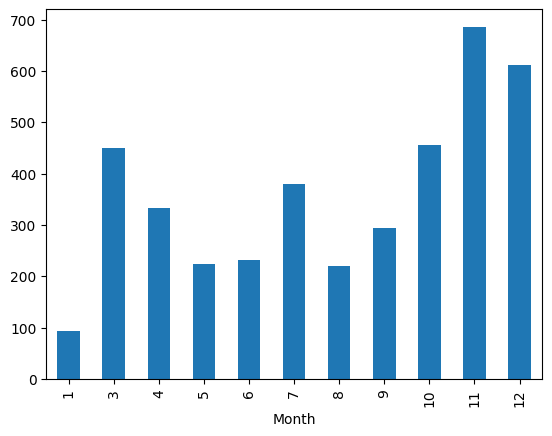

In [85]:
cols_by_date.groupby("Month")
(gross_per_month['Gross transaction amount'].agg(np.sum)).plot(kind = "bar", x = "Month", y = "Gross transaction amount")



